In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
cd /content/drive/MyDrive/test_chords

/content/drive/MyDrive/test_chords


In [9]:
"""
Algorithm based on the paper 'Automatic Chord Recognition from
Audio Using Enhanced Pitch Class Profile' by Kyogu Lee
This script computes 12 dimensional chromagram for chord detection
@author ORCHISAMA
"""

"""Create pitch profile template for 12 major and 12 minor chords and save them in a json file
Gmajor template = [1,0,0,0,1,0,0,1,0,0,0,0] - needs to be run just once"""

import json

template = dict()
major = ['G','G#','A','A#','B','C','C#','D','D#','E','F','F#']
minor = ['Gm','G#m','Am','A#m','Bm','Cm','C#m','Dm','D#m','Em','Fm','F#m']
offset = 0

#initialise lists with zeros
for chord in range(12):
	template[major[chord]] = list()
	template[minor[chord]] = list()
	for note in range(12):
		template[major[chord]].append(0)
		template[minor[chord]].append(0)

for chord in range(12):
	for note in range(12):
		if note == 0 or note == 7:
			template[major[chord]][(note+offset)%12] = 1
			template[minor[chord]][(note+offset)%12] = 1
		elif note == 4:
			template[major[chord]][(note+offset)%12] = 1
		elif note == 3:
			template[minor[chord]][(note+offset)%12] = 1
	offset += 1

#debugging
for key,value in template.items():
	print(key, value)

#save as JSON file
with open('chord_templates.json', 'w') as fp:
    json.dump(template, fp, sort_keys = False)
    print('Saved succesfully to JSON file')

	 

G [1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0]
Gm [1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0]
G# [0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0]
G#m [0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0]
A [0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0]
Am [0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0]
A# [0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0]
A#m [0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0]
B [0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1]
Bm [0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1]
C [1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0]
Cm [1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0]
C# [0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0]
C#m [0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0]
D [0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1]
Dm [0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0]
D# [1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0]
D#m [0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1]
E [0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0]
Em [1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0]
F [0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0]
Fm [0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0]
F# [0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1]
F#m [0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1]
Saved succesfully to JSON file


Time (s) Chord
0.0 N
0.6501587301587302 E
1.3003174603174603 N
1.9504761904761905 N
2.6006349206349206 N
3.250793650793651 N


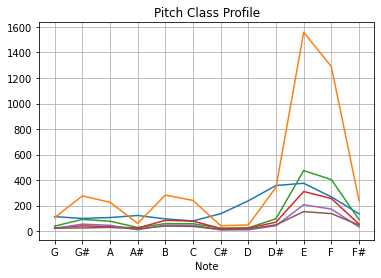

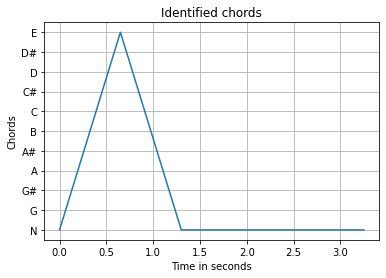

In [22]:
"""
Algorithm based on the paper 'Automatic Chord Recognition from
Audio Using Enhanced Pitch Class Profile' by Kyogu Lee
This script computes 12 dimensional chromagram for chord detection
@author ORCHISAMA
"""

from __future__ import division
import numpy as np 
import os
import matplotlib.pyplot as plt
from scipy.io.wavfile import read
import json
from chromagram import compute_chroma



"""Correlate chord with existing binary chord templates to find best batch"""


"""read from JSON file to get chord templates"""
with open('chord_templates.json', 'r') as fp:
    templates_json = json.load(fp)

chords = ['N','G','G#','A','A#','B','C','C#','D','D#','E','F','F#','Gm','G#m','Am','A#m','Bm','Cm','C#m','Dm','D#m','Em','Fm','F#m']
templates = []

for chord in chords:
	if chord is 'N':
		continue
	templates.append(templates_json[chord])


"""read audio and compute chromagram /content/drive/MyDrive/test_chords/test_chords_Grand Piano - Fazioli - major E middle.wav"""
directory = os.getcwd() + '/test_chords_'
fname = 'Grand Piano - Fazioli - major E middle.wav'
(fs,s) = read(directory +fname)

x = s[::4]
x = x[:,1]
fs = int(fs/4)

#framing audio, window length = 8192, hop size = 1024 and computing PCP
nfft = 8192
hop_size = 1024
nFrames = int(np.round(len(x)/(nfft-hop_size)))
#zero padding to make signal length long enough to have nFrames
x = np.append(x, np.zeros(nfft))
xFrame = np.empty((nfft, nFrames))
start = 0   
chroma = np.empty((12,nFrames)) 
id_chord = np.zeros(nFrames, dtype='int32')
timestamp = np.zeros(nFrames)
max_cor = np.zeros(nFrames)
print('Time (s)', 'Chord')

for n in range(nFrames):
	xFrame[:,n] = x[start:start+nfft] 
	start = start + nfft - hop_size 
	timestamp[n] = n*(nfft-hop_size)/fs
	chroma[:,n] = compute_chroma(xFrame[:,n],fs)
	plt.figure(1)
	plt.plot(chroma[:,n])

	"""Correlate 12D chroma vector with each of 24 major and minor chords"""
	cor_vec = np.zeros(24)
	for ni in range(24):
		cor_vec[ni] = np.correlate(chroma[:,n], np.array(templates[ni])) 
	max_cor[n] = np.max(cor_vec)
	id_chord[n] =  np.argmax(cor_vec) + 1


#if max_cor[n] < threshold, then no chord is played
#might need to change threshold value
id_chord[np.where(max_cor < 0.8*np.max(max_cor))] = 0
for n in range(nFrames):
	print(timestamp[n],chords[id_chord[n]])


#Plotting all figures
plt.figure(1)
notes = ['G','G#','A','A#','B','C','C#','D','D#','E','F','F#']
plt.xticks(np.arange(12),notes)
plt.title('Pitch Class Profile')
plt.xlabel('Note')
plt.grid(True)

plt.figure(2)
plt.yticks(np.arange(25), chords)
plt.plot(timestamp, id_chord)
plt.xlabel('Time in seconds')
plt.ylabel('Chords')
plt.title('Identified chords')
plt.grid(True)
plt.show()

In [57]:
"""Automatic chord recogniton with HMM, as suggested by Juan P. Bello in
'A mid level representation for harmonic content in music signals'
@author ORCHISAMA"""

from __future__ import division
from chromagram import compute_chroma
import os
from scipy.io.wavfile import read
import numpy as np 
import json


"""calculates multivariate gaussian matrix from mean and covariance matrices"""
def multivariate_gaussian(x, meu, cov):
	
	det = np.linalg.det(cov)
	val = np.exp(-0.5 * np.dot(np.dot((x-meu).T, np.linalg.inv(cov)), (x-meu)))
	try:
		val /= np.sqrt(((2*np.pi)**12)*det)
	except:
		print('Matrix is not positive, semi-definite')
	if np.isnan(val):
		val = np.finfo(float).eps
	return val


"""initialize the emission, transition and initialisation matrices for HMM in chord recognition
PI - initialisation matrix, #A - transition matrix, #B - observation matrix"""
def initialize(chroma, templates, nested_cof):

	"""initialising PI with equal probabilities"""
	PI = np.ones(24)/24

	"""initialising A based on nested circle of fifths"""
	eps = 0.01
	A = np.empty((24,24))
	for chord in chords:
		ind = nested_cof.index(chord)
		t = ind
		for i in range(24):
			if t >= 24:
				t = t%24
			A[ind][t] = (abs(12-i)+eps)/(144 + 24*eps)
			t += 1

	
	"""initialising based on tonic triads - Mean matrix; Tonic with dominant - 0.8,
	tonic with mediant 0.6 and mediant-dominant 0.8, non-triad diagonal	elements 
	with 0.2 - covariance matrix"""

	nFrames = np.shape(chroma)[1]
	B = np.zeros((24,nFrames))
	meu_mat = np.zeros((24,12))
	cov_mat = np.zeros((24,12,12))
	meu_mat = np.array(templates)
	offset = 0

	for i in range(24):
		if i == 12:
			offset = 0
		tonic = offset
		if i<12:
			mediant = (tonic + 4)%12
		else:
			mediant = (tonic + 3)%12
		dominant = (tonic+7)%12

		#weighted diagonal
		cov_mat[i,tonic,tonic] = 0.8
		cov_mat[i,mediant,mediant] = 0.6
		cov_mat[i,dominant,dominant] = 0.8

		#off-diagonal - matrix not positive semidefinite, hence determinant is negative
		# for n in [tonic,mediant,dominant]:
		# 	for m in [tonic, mediant, dominant]:
		# 		if (n is tonic and m is mediant) or (n is mediant and m is tonic):
		# 			cov_mat[i,n,m] = 0.6
		# 		else:
		# 			cov_mat[i,n,m] = 0.8

		#filling non zero diagonals
		for j in range(12):
	 		if cov_mat[i,j,j] == 0:
	 			cov_mat[i,j,j] = 0.2
    
    
		offset+=1
	

		"""observation matrix B is a multivariate Gaussian calculated from mean vector and covariance matrix"""

	for m in range(nFrames):
		for n in range(24):
			B[n,m] = multivariate_gaussian(chroma[:,m], meu_mat[n,:],cov_mat[n,:,:])

	return(PI,A,B)
	


"""Viterbi algorithm to find Path with highest probability - dynamic programming"""

def viterbi(PI,A,B):
	(nrow, ncol) = np.shape(B)
	path = np.zeros((nrow, ncol))
	states = np.zeros((nrow,ncol))
	path[:,0] = PI * B[:,0]

	for i in range(1,ncol):
		for j in range(nrow):
			s = [(path[k,i-1] * A[k,j] * B[j,i], k) for k in range(nrow)]
			(prob,state) = max(s)
			path[j,i] = prob
			states[j,i-1] = state
	
	return (path,states)



"""read from JSON file to get chord templates"""

with open('chord_templates.json', 'r') as fp:
	templates_json = json.load(fp)

chords = ['G','G#','A','A#','B','C','C#','D','D#','E','F','F#','Gm','G#m','Am','A#m','Bm','Cm','C#m','Dm','D#m','Em','Fm','F#m']
nested_cof = ['G','Bm','D','F#m','A','C#m','E','G#m','B','D#m','F#','A#m','C#',"Fm","G#",'Cm','D#','Gm','A#','Dm','F','Am','C','Em']
templates = []

for chord in chords:
	templates.append(templates_json[chord])

"""read audio and compute chromagram"""
directory = os.getcwd() + '/test_chords_';
fname = 'Grand Piano - Fazioli - minor chords - Am higher.wav';
(fs,s) = read(directory +fname)


#reduce sample rate and convert to mono
x = s[::4]
x = x[:,1]
fs = int(fs/4)

#framing audio 
nfft = 8192
hop_size = 1024
nFrames = int(np.round(len(x)/(nfft-hop_size)))

#zero padding to make signal length long enough to have nFrames
x = np.append(x, np.zeros(nfft))
xFrame = np.empty((nfft, nFrames))
start = 0   
chroma = np.empty((12,nFrames)) 
timestamp = np.zeros(nFrames)

#compute PCP
for n in range(nFrames):
	xFrame[:,n] = x[start:start+nfft] 
	start = start + nfft - hop_size 
	chroma[:,n] = compute_chroma(xFrame[:,n],fs)
	if  np.all(chroma[:,n] == 0):
		chroma[:,n] = np.finfo(float).eps
	else:
		chroma[:,n] /= np.max(np.absolute(chroma[:,n]))
	timestamp[n] = n*(nfft-hop_size)/fs 


#get max probability path from Viterbi algorithm
(PI,A,B) = initialize(chroma, templates, nested_cof)
(path, states) = viterbi(PI,A,B)

#normalize path
for i in range(nFrames):
	path[:,i] /= sum(path[:,i])

#choose most likely chord - with max value in 'path'
final_chords = []
indices = np.argmax(path,axis=0)
final_states = np.zeros(nFrames)


#find no chord zone
set_zero = np.where(np.max(path,axis=0) < 0.3*np.max(path))[0]
if np.size(set_zero) is not 0:
	indices[set_zero] = -1

#identify chords
for i in range(nFrames):
	if indices[i] == -1:
		final_chords.append('NC')
	else:
		final_states[i] = states[indices[i],i]
		final_chords.append(chords[int(final_states[i])])

print('Time(s)','Chords')
for i in range(nFrames):
	print(timestamp[i], final_chords[i])




Time(s) Chords
0.0 NC
0.6501587301587302 Am
1.3003174603174603 Am
1.9504761904761905 Am
2.6006349206349206 NC
3.250793650793651 NC
